In [8]:
import datetime
import pickle
import joblib
import numpy as np
import pandas as pd
# import matplotlib as mpl
# import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [9]:
df = pd.read_csv('expenses.csv')
df

,expensesId,expenses_fk_categoryId,expenseReason,expenseAmount,expenseDate,createdBy_fk_userId,approvedBy_fk_userId,softDelete
0,1,13,AR 236AT Solomon,15000.0,2020-05-12,1017,0,0
1,2,11,fuel,5500.0,2020-05-12,1017,0,0
2,3,12,fuel for generator,10000.0,2020-05-12,1017,0,0
3,4,2,Refund of thermal printer,12000.0,2020-05-12,1017,0,0
4,5,14,Bag for shop,1400.0,2020-05-12,1017,0,0
...,...,...,...,...,...,...,...,...
6617,6646,5,dog food,200.0,2023-11-09,1025,0,0
6618,6647,5,shop airtime,500.0,2023-11-09,1025,0,0
6619,6648,5,dry cleaning,6000.0,2023-11-09,1025,0,0
6620,6649,5,fabalon,11500.0,2023-11-09,1025,0,0


In [10]:
selected_columns =['expenseAmount', 'expenseDate']
df = df[selected_columns]
df.copy()
df

,expenseAmount,expenseDate
0,15000.0,2020-05-12
1,5500.0,2020-05-12
2,10000.0,2020-05-12
3,12000.0,2020-05-12
4,1400.0,2020-05-12
...,...,...
6617,200.0,2023-11-09
6618,500.0,2023-11-09
6619,6000.0,2023-11-09
6620,11500.0,2023-11-09


In [11]:
df['expenseDate'] = pd.to_datetime(df['expenseDate'], dayfirst=True)
df.index = df['expenseDate']
df

ValueError: unconverted data remains when parsing with format "%Y-%d-%m": "3", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [7]:
df['Year'] = df['expenseDate'].dt.year
df['Month'] = df['expenseDate'].dt.month
df_monthly = df.groupby(['Year', 'Month'])['expenseAmount'].sum().reset_index()
# df_monthly = df_monthly.set_index('Month')
df_monthly

AttributeError: Can only use .dt accessor with datetimelike values

<Axes: >

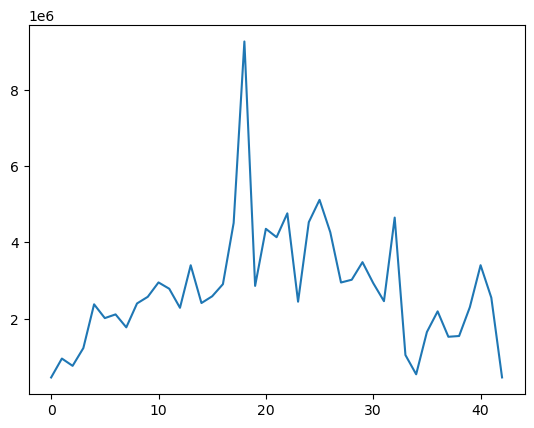

In [6]:
expenses = df_monthly['expenseAmount']
expenses

In [7]:
expenses = np.array(expenses).reshape(-1,1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(expenses)

In [8]:
def df_to_X_y(df, window_size=4):
    df_as_np = df
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [9]:
WINDOW_SIZE = 4
X, y = df_to_X_y(scaled_data, WINDOW_SIZE)
X.shape, y.shape

((39, 4, 1, 1), (39, 1))

In [10]:
X

array([[[[0.        ]],

        [[0.05632673]],

        [[0.03461951]],

        [[0.08752563]]],


       [[[0.05632673]],

        [[0.03461951]],

        [[0.08752563]],

        [[0.21773555]]],


       [[[0.03461951]],

        [[0.08752563]],

        [[0.21773555]],

        [[0.1767017 ]]],


       [[[0.08752563]],

        [[0.21773555]],

        [[0.1767017 ]],

        [[0.18774296]]],


       [[[0.21773555]],

        [[0.1767017 ]],

        [[0.18774296]],

        [[0.14922578]]],


       [[[0.1767017 ]],

        [[0.18774296]],

        [[0.14922578]],

        [[0.2203248 ]]],


       [[[0.18774296]],

        [[0.14922578]],

        [[0.2203248 ]],

        [[0.24007387]]],


       [[[0.14922578]],

        [[0.2203248 ]],

        [[0.24007387]],

        [[0.28288084]]],


       [[[0.2203248 ]],

        [[0.24007387]],

        [[0.28288084]],

        [[0.26411488]]],


       [[[0.24007387]],

        [[0.28288084]],

        [[0.26411488]],

       

In [11]:
y

array([[2.17735552e-01],
       [1.76701701e-01],
       [1.87742959e-01],
       [1.49225775e-01],
       [2.20324802e-01],
       [2.40073869e-01],
       [2.82880836e-01],
       [2.64114878e-01],
       [2.07374802e-01],
       [3.33984309e-01],
       [2.21543039e-01],
       [2.41653885e-01],
       [2.77690977e-01],
       [4.59971010e-01],
       [1.00000000e+00],
       [2.72581539e-01],
       [4.42436919e-01],
       [4.17469255e-01],
       [4.88470936e-01],
       [2.25547034e-01],
       [4.62265498e-01],
       [5.28673887e-01],
       [4.32347192e-01],
       [2.82657635e-01],
       [2.90907455e-01],
       [3.43207696e-01],
       [2.80898717e-01],
       [2.27097517e-01],
       [4.75867723e-01],
       [6.67786877e-02],
       [9.48464096e-03],
       [1.35312886e-01],
       [1.96792101e-01],
       [1.21142151e-01],
       [1.23425280e-01],
       [2.09232883e-01],
       [3.34137654e-01],
       [2.37465877e-01],
       [1.36419806e-04]])

In [12]:
X_train, y_train = X[:37], y[:37]
X_val, y_val = X[37:39], y[37:39]
X_test, y_test = X[39:], y[39:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((37, 4, 1, 1), (37, 1), (2, 4, 1, 1), (2, 1), (0, 4, 1, 1), (0, 1))

In [13]:
X_train

array([[[[0.        ]],

        [[0.05632673]],

        [[0.03461951]],

        [[0.08752563]]],


       [[[0.05632673]],

        [[0.03461951]],

        [[0.08752563]],

        [[0.21773555]]],


       [[[0.03461951]],

        [[0.08752563]],

        [[0.21773555]],

        [[0.1767017 ]]],


       [[[0.08752563]],

        [[0.21773555]],

        [[0.1767017 ]],

        [[0.18774296]]],


       [[[0.21773555]],

        [[0.1767017 ]],

        [[0.18774296]],

        [[0.14922578]]],


       [[[0.1767017 ]],

        [[0.18774296]],

        [[0.14922578]],

        [[0.2203248 ]]],


       [[[0.18774296]],

        [[0.14922578]],

        [[0.2203248 ]],

        [[0.24007387]]],


       [[[0.14922578]],

        [[0.2203248 ]],

        [[0.24007387]],

        [[0.28288084]]],


       [[[0.2203248 ]],

        [[0.24007387]],

        [[0.28288084]],

        [[0.26411488]]],


       [[[0.24007387]],

        [[0.28288084]],

        [[0.26411488]],

       

In [14]:
y_train

array([[0.21773555],
       [0.1767017 ],
       [0.18774296],
       [0.14922578],
       [0.2203248 ],
       [0.24007387],
       [0.28288084],
       [0.26411488],
       [0.2073748 ],
       [0.33398431],
       [0.22154304],
       [0.24165389],
       [0.27769098],
       [0.45997101],
       [1.        ],
       [0.27258154],
       [0.44243692],
       [0.41746925],
       [0.48847094],
       [0.22554703],
       [0.4622655 ],
       [0.52867389],
       [0.43234719],
       [0.28265764],
       [0.29090746],
       [0.3432077 ],
       [0.28089872],
       [0.22709752],
       [0.47586772],
       [0.06677869],
       [0.00948464],
       [0.13531289],
       [0.1967921 ],
       [0.12114215],
       [0.12342528],
       [0.20923288],
       [0.33413765]])

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((4,1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
cp = ModelCheckpoint('Expenses Prediction Model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics = [RootMeanSquaredError()])

In [17]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, callbacks=[cp])

Epoch 1/500
1/2 [==============>...............] - ETA: 8s - loss: 0.0897 - root_mean_squared_error: 0.2996INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 19s 11s/step - loss: 0.0897 - root_mean_squared_error: 0.2995 - val_loss: 0.0209 - val_root_mean_squared_error: 0.1447
Epoch 2/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0893 - root_mean_squared_error: 0.2988INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0882 - root_mean_squared_error: 0.2970 - val_loss: 0.0205 - val_root_mean_squared_error: 0.1433
Epoch 3/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0877 - root_mean_squared_error: 0.2961INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0868 - root_mean_squared_error: 0.2946 - val_loss: 0.0202 - val_root_mean_squared_error: 0.1420
Epoch 4/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0867 - root_mean_squared_error: 0.2945INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0853 - root_mean_squared_error: 0.2921 - val_loss: 0.0198 - val_root_mean_squared_error: 0.1407
Epoch 5/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0827 - root_mean_squared_error: 0.2876INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0839 - root_mean_squared_error: 0.2896 - val_loss: 0.0195 - val_root_mean_squared_error: 0.1395
Epoch 6/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0871 - root_mean_squared_error: 0.2951INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0825 - root_mean_squared_error: 0.2872 - val_loss: 0.0191 - val_root_mean_squared_error: 0.1383
Epoch 7/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0855 - root_mean_squared_error: 0.2924INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 9s 9s/step - loss: 0.0811 - root_mean_squared_error: 0.2848 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1371
Epoch 8/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0885 - root_mean_squared_error: 0.2975INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0798 - root_mean_squared_error: 0.2825 - val_loss: 0.0185 - val_root_mean_squared_error: 0.1360
Epoch 9/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0764 - root_mean_squared_error: 0.2764INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0784 - root_mean_squared_error: 0.2800 - val_loss: 0.0182 - val_root_mean_squared_error: 0.1349
Epoch 10/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0809 - root_mean_squared_error: 0.2845INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0771 - root_mean_squared_error: 0.2777 - val_loss: 0.0179 - val_root_mean_squared_error: 0.1338
Epoch 11/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0730 - root_mean_squared_error: 0.2701INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0757 - root_mean_squared_error: 0.2752 - val_loss: 0.0176 - val_root_mean_squared_error: 0.1328
Epoch 12/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0769 - root_mean_squared_error: 0.2773INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0745 - root_mean_squared_error: 0.2729 - val_loss: 0.0174 - val_root_mean_squared_error: 0.1318
Epoch 13/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0733 - root_mean_squared_error: 0.2708INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0732 - root_mean_squared_error: 0.2705 - val_loss: 0.0171 - val_root_mean_squared_error: 0.1309
Epoch 14/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0762 - root_mean_squared_error: 0.2761INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0719 - root_mean_squared_error: 0.2681 - val_loss: 0.0169 - val_root_mean_squared_error: 0.1299
Epoch 15/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0703 - root_mean_squared_error: 0.2651INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0706 - root_mean_squared_error: 0.2657 - val_loss: 0.0167 - val_root_mean_squared_error: 0.1291
Epoch 16/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0731 - root_mean_squared_error: 0.2703INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0694 - root_mean_squared_error: 0.2634 - val_loss: 0.0165 - val_root_mean_squared_error: 0.1283
Epoch 17/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0710 - root_mean_squared_error: 0.2664INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0681 - root_mean_squared_error: 0.2610 - val_loss: 0.0163 - val_root_mean_squared_error: 0.1275
Epoch 18/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0736 - root_mean_squared_error: 0.2713INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0669 - root_mean_squared_error: 0.2587 - val_loss: 0.0161 - val_root_mean_squared_error: 0.1268
Epoch 19/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0691 - root_mean_squared_error: 0.2629INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0657 - root_mean_squared_error: 0.2564 - val_loss: 0.0159 - val_root_mean_squared_error: 0.1261
Epoch 20/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0665 - root_mean_squared_error: 0.2578INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0645 - root_mean_squared_error: 0.2541 - val_loss: 0.0157 - val_root_mean_squared_error: 0.1255
Epoch 21/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0683 - root_mean_squared_error: 0.2613INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0634 - root_mean_squared_error: 0.2518 - val_loss: 0.0156 - val_root_mean_squared_error: 0.1249
Epoch 22/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0684 - root_mean_squared_error: 0.2615INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0623 - root_mean_squared_error: 0.2496 - val_loss: 0.0155 - val_root_mean_squared_error: 0.1244
Epoch 23/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0646 - root_mean_squared_error: 0.2541INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0612 - root_mean_squared_error: 0.2473 - val_loss: 0.0154 - val_root_mean_squared_error: 0.1239
Epoch 24/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0596 - root_mean_squared_error: 0.2442INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 9s 9s/step - loss: 0.0600 - root_mean_squared_error: 0.2450 - val_loss: 0.0152 - val_root_mean_squared_error: 0.1235
Epoch 25/500
2/2 [==============================] - ETA: 0s - loss: 0.0590 - root_mean_squared_error: 0.2429INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 8s 8s/step - loss: 0.0590 - root_mean_squared_error: 0.2429 - val_loss: 0.0151 - val_root_mean_squared_error: 0.1231
Epoch 26/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0618 - root_mean_squared_error: 0.2487INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0579 - root_mean_squared_error: 0.2407 - val_loss: 0.0151 - val_root_mean_squared_error: 0.1227
Epoch 27/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0597 - root_mean_squared_error: 0.2443INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0568 - root_mean_squared_error: 0.2384 - val_loss: 0.0150 - val_root_mean_squared_error: 0.1225
Epoch 28/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0581 - root_mean_squared_error: 0.2411INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0558 - root_mean_squared_error: 0.2362 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1222
Epoch 29/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0350 - root_mean_squared_error: 0.1870INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0547 - root_mean_squared_error: 0.2339 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1220
Epoch 30/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0606 - root_mean_squared_error: 0.2462INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0538 - root_mean_squared_error: 0.2319 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1219
Epoch 31/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0546 - root_mean_squared_error: 0.2336INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0527 - root_mean_squared_error: 0.2296 - val_loss: 0.0148 - val_root_mean_squared_error: 0.1218
Epoch 32/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0307 - root_mean_squared_error: 0.1751INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


INFO:tensorflow:Assets written to: Expenses Prediction Model\assets


2/2 [==============================] - 7s 7s/step - loss: 0.0517 - root_mean_squared_error: 0.2273 - val_loss: 0.0148 - val_root_mean_squared_error: 0.1218
Epoch 33/500
2/2 [==============================] - 0s 75ms/step - loss: 0.0507 - root_mean_squared_error: 0.2253 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1219
Epoch 34/500
2/2 [==============================] - 0s 83ms/step - loss: 0.0497 - root_mean_squared_error: 0.2230 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1220
Epoch 35/500
2/2 [==============================] - 0s 74ms/step - loss: 0.0488 - root_mean_squared_error: 0.2209 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1221
Epoch 36/500
2/2 [==============================] - 0s 58ms/step - loss: 0.0478 - root_mean_squared_error: 0.2186 - val_loss: 0.0150 - val_root_mean_squared_error: 0.1224
Epoch 37/500
2/2 [==============================] - 0s 84ms/step - loss: 0.0468 - root_mean_squared_error: 0.2164 - val_loss: 0.0150 - val_root_mean_squared_err

Epoch 80/500
2/2 [==============================] - 0s 103ms/step - loss: 0.0242 - root_mean_squared_error: 0.1555 - val_loss: 0.0290 - val_root_mean_squared_error: 0.1703
Epoch 81/500
2/2 [==============================] - 0s 72ms/step - loss: 0.0241 - root_mean_squared_error: 0.1552 - val_loss: 0.0294 - val_root_mean_squared_error: 0.1714
Epoch 82/500
2/2 [==============================] - 0s 78ms/step - loss: 0.0240 - root_mean_squared_error: 0.1549 - val_loss: 0.0297 - val_root_mean_squared_error: 0.1723
Epoch 83/500
2/2 [==============================] - 0s 62ms/step - loss: 0.0239 - root_mean_squared_error: 0.1546 - val_loss: 0.0300 - val_root_mean_squared_error: 0.1732
Epoch 84/500
2/2 [==============================] - 0s 91ms/step - loss: 0.0238 - root_mean_squared_error: 0.1543 - val_loss: 0.0303 - val_root_mean_squared_error: 0.1741
Epoch 85/500
2/2 [==============================] - 0s 79ms/step - loss: 0.0238 - root_mean_squared_error: 0.1541 - val_loss: 0.0306 - val_root_

Epoch 128/500
2/2 [==============================] - 0s 74ms/step - loss: 0.0232 - root_mean_squared_error: 0.1525 - val_loss: 0.0346 - val_root_mean_squared_error: 0.1860
Epoch 129/500
2/2 [==============================] - 0s 81ms/step - loss: 0.0232 - root_mean_squared_error: 0.1525 - val_loss: 0.0345 - val_root_mean_squared_error: 0.1858
Epoch 130/500
2/2 [==============================] - 0s 98ms/step - loss: 0.0232 - root_mean_squared_error: 0.1525 - val_loss: 0.0345 - val_root_mean_squared_error: 0.1856
Epoch 131/500
2/2 [==============================] - 0s 79ms/step - loss: 0.0232 - root_mean_squared_error: 0.1525 - val_loss: 0.0344 - val_root_mean_squared_error: 0.1854
Epoch 132/500
2/2 [==============================] - 0s 83ms/step - loss: 0.0232 - root_mean_squared_error: 0.1525 - val_loss: 0.0344 - val_root_mean_squared_error: 0.1853
Epoch 133/500
2/2 [==============================] - 0s 63ms/step - loss: 0.0232 - root_mean_squared_error: 0.1525 - val_loss: 0.0344 - val_

2/2 [==============================] - 0s 82ms/step - loss: 0.0232 - root_mean_squared_error: 0.1525 - val_loss: 0.0361 - val_root_mean_squared_error: 0.1900
Epoch 176/500
2/2 [==============================] - 0s 64ms/step - loss: 0.0232 - root_mean_squared_error: 0.1524 - val_loss: 0.0362 - val_root_mean_squared_error: 0.1902
Epoch 177/500
2/2 [==============================] - 0s 66ms/step - loss: 0.0232 - root_mean_squared_error: 0.1524 - val_loss: 0.0363 - val_root_mean_squared_error: 0.1904
Epoch 178/500
2/2 [==============================] - 0s 93ms/step - loss: 0.0232 - root_mean_squared_error: 0.1525 - val_loss: 0.0363 - val_root_mean_squared_error: 0.1904
Epoch 179/500
2/2 [==============================] - 0s 116ms/step - loss: 0.0232 - root_mean_squared_error: 0.1524 - val_loss: 0.0362 - val_root_mean_squared_error: 0.1903
Epoch 180/500
2/2 [==============================] - 0s 78ms/step - loss: 0.0232 - root_mean_squared_error: 0.1525 - val_loss: 0.0362 - val_root_mean_squ

Epoch 223/500
2/2 [==============================] - 0s 77ms/step - loss: 0.0232 - root_mean_squared_error: 0.1525 - val_loss: 0.0336 - val_root_mean_squared_error: 0.1833
Epoch 224/500
2/2 [==============================] - 0s 79ms/step - loss: 0.0232 - root_mean_squared_error: 0.1525 - val_loss: 0.0337 - val_root_mean_squared_error: 0.1834
Epoch 225/500
2/2 [==============================] - 0s 62ms/step - loss: 0.0232 - root_mean_squared_error: 0.1525 - val_loss: 0.0338 - val_root_mean_squared_error: 0.1837
Epoch 226/500
2/2 [==============================] - 0s 66ms/step - loss: 0.0232 - root_mean_squared_error: 0.1524 - val_loss: 0.0340 - val_root_mean_squared_error: 0.1843
Epoch 227/500
2/2 [==============================] - 0s 90ms/step - loss: 0.0232 - root_mean_squared_error: 0.1524 - val_loss: 0.0342 - val_root_mean_squared_error: 0.1848
Epoch 228/500
2/2 [==============================] - 0s 79ms/step - loss: 0.0232 - root_mean_squared_error: 0.1523 - val_loss: 0.0344 - val_

2/2 [==============================] - 0s 74ms/step - loss: 0.0232 - root_mean_squared_error: 0.1523 - val_loss: 0.0348 - val_root_mean_squared_error: 0.1865
Epoch 271/500
2/2 [==============================] - 0s 90ms/step - loss: 0.0232 - root_mean_squared_error: 0.1523 - val_loss: 0.0346 - val_root_mean_squared_error: 0.1861
Epoch 272/500
2/2 [==============================] - 0s 71ms/step - loss: 0.0232 - root_mean_squared_error: 0.1523 - val_loss: 0.0344 - val_root_mean_squared_error: 0.1856
Epoch 273/500
2/2 [==============================] - 0s 80ms/step - loss: 0.0232 - root_mean_squared_error: 0.1523 - val_loss: 0.0343 - val_root_mean_squared_error: 0.1852
Epoch 274/500
2/2 [==============================] - 0s 77ms/step - loss: 0.0232 - root_mean_squared_error: 0.1523 - val_loss: 0.0341 - val_root_mean_squared_error: 0.1847
Epoch 275/500
2/2 [==============================] - 0s 80ms/step - loss: 0.0232 - root_mean_squared_error: 0.1524 - val_loss: 0.0340 - val_root_mean_squa

Epoch 318/500
2/2 [==============================] - 0s 75ms/step - loss: 0.0232 - root_mean_squared_error: 0.1523 - val_loss: 0.0354 - val_root_mean_squared_error: 0.1882
Epoch 319/500
2/2 [==============================] - 0s 79ms/step - loss: 0.0232 - root_mean_squared_error: 0.1523 - val_loss: 0.0357 - val_root_mean_squared_error: 0.1891
Epoch 320/500
2/2 [==============================] - 0s 115ms/step - loss: 0.0232 - root_mean_squared_error: 0.1524 - val_loss: 0.0360 - val_root_mean_squared_error: 0.1898
Epoch 321/500
2/2 [==============================] - 0s 72ms/step - loss: 0.0232 - root_mean_squared_error: 0.1524 - val_loss: 0.0362 - val_root_mean_squared_error: 0.1901
Epoch 322/500
2/2 [==============================] - 0s 80ms/step - loss: 0.0232 - root_mean_squared_error: 0.1524 - val_loss: 0.0362 - val_root_mean_squared_error: 0.1902
Epoch 323/500
2/2 [==============================] - 0s 80ms/step - loss: 0.0232 - root_mean_squared_error: 0.1524 - val_loss: 0.0361 - val

2/2 [==============================] - 0s 66ms/step - loss: 0.0233 - root_mean_squared_error: 0.1526 - val_loss: 0.0375 - val_root_mean_squared_error: 0.1937
Epoch 366/500
2/2 [==============================] - 0s 63ms/step - loss: 0.0233 - root_mean_squared_error: 0.1527 - val_loss: 0.0379 - val_root_mean_squared_error: 0.1947
Epoch 367/500
2/2 [==============================] - 0s 63ms/step - loss: 0.0234 - root_mean_squared_error: 0.1529 - val_loss: 0.0381 - val_root_mean_squared_error: 0.1953
Epoch 368/500
2/2 [==============================] - 0s 68ms/step - loss: 0.0234 - root_mean_squared_error: 0.1530 - val_loss: 0.0381 - val_root_mean_squared_error: 0.1952
Epoch 369/500
2/2 [==============================] - 0s 61ms/step - loss: 0.0234 - root_mean_squared_error: 0.1529 - val_loss: 0.0379 - val_root_mean_squared_error: 0.1947
Epoch 370/500
2/2 [==============================] - 0s 61ms/step - loss: 0.0234 - root_mean_squared_error: 0.1529 - val_loss: 0.0377 - val_root_mean_squa

Epoch 413/500
2/2 [==============================] - 0s 78ms/step - loss: 0.0232 - root_mean_squared_error: 0.1523 - val_loss: 0.0349 - val_root_mean_squared_error: 0.1867
Epoch 414/500
2/2 [==============================] - 0s 78ms/step - loss: 0.0232 - root_mean_squared_error: 0.1523 - val_loss: 0.0347 - val_root_mean_squared_error: 0.1862
Epoch 415/500
2/2 [==============================] - 0s 62ms/step - loss: 0.0232 - root_mean_squared_error: 0.1523 - val_loss: 0.0346 - val_root_mean_squared_error: 0.1860
Epoch 416/500
2/2 [==============================] - 0s 71ms/step - loss: 0.0232 - root_mean_squared_error: 0.1523 - val_loss: 0.0346 - val_root_mean_squared_error: 0.1861
Epoch 417/500
2/2 [==============================] - 0s 77ms/step - loss: 0.0232 - root_mean_squared_error: 0.1523 - val_loss: 0.0346 - val_root_mean_squared_error: 0.1861
Epoch 418/500
2/2 [==============================] - 0s 74ms/step - loss: 0.0232 - root_mean_squared_error: 0.1523 - val_loss: 0.0346 - val_

2/2 [==============================] - 0s 85ms/step - loss: 0.0233 - root_mean_squared_error: 0.1526 - val_loss: 0.0322 - val_root_mean_squared_error: 0.1796
Epoch 461/500
2/2 [==============================] - 0s 75ms/step - loss: 0.0233 - root_mean_squared_error: 0.1526 - val_loss: 0.0323 - val_root_mean_squared_error: 0.1798
Epoch 462/500
2/2 [==============================] - 0s 66ms/step - loss: 0.0233 - root_mean_squared_error: 0.1526 - val_loss: 0.0325 - val_root_mean_squared_error: 0.1804
Epoch 463/500
2/2 [==============================] - 0s 80ms/step - loss: 0.0233 - root_mean_squared_error: 0.1525 - val_loss: 0.0327 - val_root_mean_squared_error: 0.1809
Epoch 464/500
2/2 [==============================] - 0s 80ms/step - loss: 0.0232 - root_mean_squared_error: 0.1525 - val_loss: 0.0329 - val_root_mean_squared_error: 0.1813
Epoch 465/500
2/2 [==============================] - 0s 96ms/step - loss: 0.0232 - root_mean_squared_error: 0.1524 - val_loss: 0.0329 - val_root_mean_squa

In [18]:
from tensorflow.keras.models import load_model
model = load_model('Expenses Prediction Model/')
filename = 'expenses_model.h5'
joblib.dump(model, filename)

['expenses_model.h5']

In [21]:
train_predictions = model.predict(X_train)
predictions = scaler.inverse_transform(train_predictions).flatten()
train_target = scaler.inverse_transform(y_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': predictions, 'Actuals':train_target})
train_results

2/2 [==============================] - 0s 13ms/step


,Train Predictions,Actuals
0,1057794.750,2379730.0
1,1205756.375,2018480.0
2,1278502.250,2115684.0
3,1356620.750,1776590.0
4,1371877.875,2402525.0
5,1388420.625,2576390.0
6,1433717.750,2953250.0
7,1500479.625,2788040.0
8,1557164.625,2288517.0
9,1533969.875,3403150.0


In [20]:
val_predictions = model.predict(X_val)
val_results = scaler.inverse_transform(val_predictions).flatten()
val_target = scaler.inverse_transform(y_val).flatten()
validation_results = pd.DataFrame(data={'Validation Predictions': val_results, 'Actuals':val_target})
validation_results

1/1 [==============================] - 0s 31ms/step


,Validation Predictions,Actuals
0,1438922.125,2553430.0
1,1506062.875,464051.0


In [21]:
test_predictions = model.predict(X_test)
test_results = scaler.inverse_transform(test_predictions).flatten()
test_target = scaler.inverse_transform(y_test).flatten()
test_results = pd.DataFrame(data={'Validation Predictions': test_results, 'Actuals': test_target})
test_results

ValueError: Expected input data to be non-empty.

In [ ]:
predict = model.predict(X_test)
predict